In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-29 10:30:42.636522: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_mean_15x15_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10278  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10279  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10280  0.078067 -0.018678  257.009999  2491.665562   994.575354   995.806006   
10281  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10282  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.456680   
1      4.113529  4.223896  63.821798  62.581992  ...           112.456680   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.639282   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.639282   
4      4.405489  4.587935  60.655199  58.351445  ...            55.364151   
...         ...       ...        ...        ...  ...                  ...   
10278  4.236066  4.264247  89.521652  89.357990  ...           105.259995   
10279  4.237512  4.264786  90.106352  89.978233  ...           105.259995   
10280  3.944905  3.985403  85.225852  84.833879  ...           101.620956   
10281  3.745458  3.792684  82.634552  82.112733  ...           -97.125244   
10282  3.823687  3.867705  84.046602  83.596072  ...          -110.358894   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.638290           22.951035            60.326477   
1               67.638290           22.951035            60.326477   
2              -98.664177          -52.691067            57.320530   
3              -98.664177          -52.691067            57.320530   
4              100.922295          146.354370            42.654518   
...                   ...                 ...                  ...   
10278           60.566189           15.795075            50.956249   
10279           60.566189           15.795075            50.956249   
10280           56.967621           12.226667            63.353329   
10281          -68.339409          -39.559307            50.591187   
10282          -77.204796          -44.028999            50.682098   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               49.190151           60.188553    20180403T030600Z   
1               49.190151           60.188553    20180403T030600Z   
2               45.911644           57.209595    20180404T042700Z   
3               45.911644           57.209595    20180404T042700Z   
4               32.508965           42.634296    20180404T175400Z   
...                   ...                 ...                 ...   
10278           40.331722           50.911419    20200121T200600Z   
10279           40.331722           50.911419    20200121T200600Z   
10280           52.370003           63.477142    20200121T203900Z   
10281           39.826828           50.510693    20200121T214800Z   
10282           39.799301           50.399101    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10278  20200121T214758.125000Z  7.869203 -2.273894  
10279  20200121T214758.125000Z  7

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10278  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10279  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10280  0.078067 -0.018678  257.009999  2491.665562   994.575354   995.806006   
10281  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10282  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.456680   
1      4.113529  4.223896  63.821798  62.581992  ...           112.456680   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.639282   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.639282   
4      4.405489  4.587935  60.655199  58.351445  ...            55.364151   
...         ...       ...        ...        ...  ...                  ...   
10278  4.236066  4.264247  89.521652  89.357990  ...           105.259995   
10279  4.237512  4.264786  90.106352  89.978233  ...           105.259995   
10280  3.944905  3.985403  85.225852  84.833879  ...           101.620956   
10281  3.745458  3.792684  82.634552  82.112733  ...           -97.125244   
10282  3.823687  3.867705  84.046602  83.596072  ...          -110.358894   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.638290           22.951035            60.326477   
1               67.638290           22.951035            60.326477   
2              -98.664177          -52.691067            57.320530   
3              -98.664177          -52.691067            57.320530   
4              100.922295          146.354370            42.654518   
...                   ...                 ...                  ...   
10278           60.566189           15.795075            50.956249   
10279           60.566189           15.795075            50.956249   
10280           56.967621           12.226667            63.353329   
10281          -68.339409          -39.559307            50.591187   
10282          -77.204796          -44.028999            50.682098   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               49.190151           60.188553    20180403T030600Z   
1               49.190151           60.188553    20180403T030600Z   
2               45.911644           57.209595    20180404T042700Z   
3               45.911644           57.209595    20180404T042700Z   
4               32.508965           42.634296    20180404T175400Z   
...                   ...                 ...                 ...   
10278           40.331722           50.911419    20200121T200600Z   
10279           40.331722           50.911419    20200121T200600Z   
10280           52.370003           63.477142    20200121T203900Z   
10281           39.826828           50.510693    20200121T214800Z   
10282           39.799301           50.399101    20200121T221800Z   

             stop_sensing_time       u10       v10  
0      20180403T044758.125000Z -4.214585  3.935597  
1      20180403T044758.125000Z -3.485326  3.685807  
2      20180404T060858.125000Z  0.053796  2.618398  
3      20180404T060858.125000Z  1.969399  1.141287  
4      20180404T193258.125000Z  4.476319  0.497334  
...                        ...       ...       ...  
10278  20200121T214758.125000Z  7.869203 -2.273894  
10279  20200121T214758.125000Z  7

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
6695  -0.166325  0.032552  303.665002  2472.124089  1018.104711  1019.343497   
8101  -0.012150 -0.032903  339.080000  2491.618001  1006.686846  1007.924005   
92     0.092290 -0.242717  357.824998  2474.749279  1013.412880  1014.627994   
2432   0.007029 -0.078946  296.919998  2480.874117  1010.410119  1011.654504   
925   -0.143647 -0.288431  309.275002  2469.035568  1014.591792  1015.791016   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  242.205001  2491.083715  1016.356401  1017.612003   
9509  -0.294259 -0.331599  314.570000  2482.275291  1017.236406  1018.487500   
2283  -0.175301  0.137656  245.100003  2483.387743  1013.904479  1015.144501   
10196  0.078067 -0.018678  256.399999  2490.809218  1005.055327  1006.301511   
8799  -0.012150 -0.032903  265.455005  2485.918551  1013.796961  1015.032999   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
6695   4.456216  4.561627  74.298850  73.479006  ...           -23.210381   
8101   5.072902  5.062798  97.073604  97.266637  ...          -123.499336   
92     7.196344  7.228246  91.253049  91.195832  ...           112.976738   
2432   3.036308  3.200472  64.910397  62.731035  ...            53.234100   
925    8.887799  8.932468  87.925201  87.062104  ...           115.114052   
...         ...       ...        ...        ...  ...                  ...   
7832   3.160835  3.232717  67.876904  66.673083  ...           -95.357903   
9509   3.200213  3.341411  66.547449  64.709346  ...             3.748611   
2283   3.383261  3.524088  62.881447  60.933615  ...           -43.354778   
10196  3.218143  3.279199  73.182002  72.328062  ...            52.157421   
8799   4.982451  5.031655  83.293603  82.509446  ...            57.393219   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
6695           -67.946144         -112.866585            56.233925   
8101           -85.610435          -47.687469            51.241974   
92              68.161835           23.473623            57.974670   
2432            99.087616          144.827271            55.906242   
925             70.271904           25.555819            45.934273   
...                   ...                 ...                  ...   
7832           -67.629547          -39.894093            50.907547   
9509            -2.532592           -8.747593            50.801388   
2283           -32.932220          -22.502556            51.055885   
10196           98.331863          144.363419            56.923378   
8799           102.790283          148.240570            38.981037   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
6695            45.348351           56.358917    20161206T185400Z   
8101            40.270222           50.924290    20210306T223300Z   
92              46.869724           57.839405    20180427T030900Z   
2432            44.744244           55.930729    20180310T135100Z   
925             35.568638           45.809589    20160904T032400Z   
...                   ...                 ...                 ...   
7832            40.034092           50.663631    20210118T220600Z   
9509            40.113705           50.683331    20190117T000000Z   
2283            40.348221           50.985111    20180120T003300Z   
10196           45.521290           56.942837    20191230T121500Z   
8799            29.216494           38.722816    20210615T124200Z   

             stop_sensing_time        u10       v10  
6695   20161206T203558.125000Z  -1.895058 -1.117296  
8101   20210307T001758.125000Z  -1.301292 -4.403464  
92     20180427T045058.125000Z  -1.132533  1.051995  
2432   20180310T153258.125000Z  -1.533837  2.975935  
925    20160904T050558.125000Z   1.294801 -0.879163  
...                        ...        ...       ...  
7832   20210118T234758.125000Z   9.176244  4.120052  
9509   20190117T014158.12

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

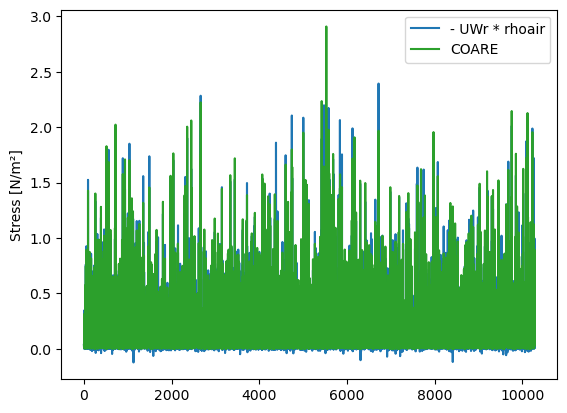

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

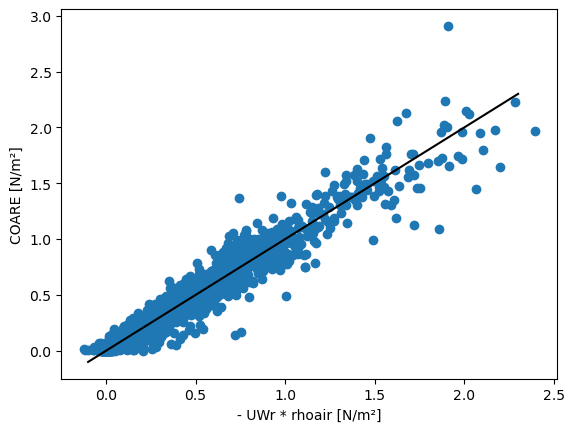

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10283, 67)

In [13]:
df.shape[0]*0.8

8226.4

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

8226

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

sigma0_trip_fore  sigma0_trip_mid  sigma0_trip_aft  \
6695         -17.414715       -16.166349       -18.155245   
8101         -14.889147       -11.428328       -14.231544   
92           -19.091215       -16.745169       -18.935488   
2432         -15.642890       -10.873974       -15.431181   
925          -15.800575       -14.246487       -15.146963   
...                 ...              ...              ...   
7832         -16.035215       -12.756651       -16.629040   
9509         -17.410261       -14.830855       -17.473223   
2283         -16.058849       -13.086169       -15.602591   
10196        -20.005423       -19.146595       -22.425808   
8799         -19.495529       -12.042070       -17.288612   

       azi_angle_trip_fore  azi_angle_trip_mid  azi_angle_trip_aft  \
6695            -23.210381          -67.946144         -112.866585   
8101           -123.499336          -85.610435          -47.687469   
92              112.976738           68.161835           23.473623   
2432             53.234100           99.087616          144.827271   
925             115.114052           70.271904           25.555819   
...                    ...                 ...                 ...   
7832            -95.357903          -67.629547          -39.894093   
9509              3.748611           -2.532592           -8.747593   
2283            -43.354778          -32.932220          -22.502556   
10196            52.157421           98.331863          144.363419   
8799             57.393219          102.790283          148.240570   

       inc_angle_trip_fore  inc_angle_trip_mid  inc_angle_trip_aft        u10  \
6695             56.233925           45.348351           56.358917  -1.895058   
8101             51.241974           40.270222           50.924290  -1.301292   
92               57.974670           46.869724           57.839405  -1.132533   
2432             55.906242           44.744244           55.930729  -1.533837   
925              45.934273           35.568638           45.809589   1.294801   
...                    ...                 ...                 ...        ...   
7832             50.907547           40.034092           50.663631   9.176244   
9509             50.801388           40.113705           50.683331   0.895454   
2283             51.055885           40.348221           50.985111   0.494966   
10196            56.923378           45.521290           56.942837  11.444406   
8799             38.981037           29.216494           38.722816  -0.719789   

            v10  
6695  -1.117296  
8101  -4.403464  
92     1.051995  
2432   2.975935  
925   -0.879163  
...         ...  
7832   4.120052  
9509  -2.271060  
2283   1.721997  
10196 -0.597892  
8799   5.387703  

[10283 rows x 11 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

6695     0.036989
8101     0.211704
92       0.015333
2432     0.345724
925      0.035426
           ...   
7832     0.150614
9509     0.174615
2283     0.181099
10196    0.101902
8799     0.015557
Length: 10283, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

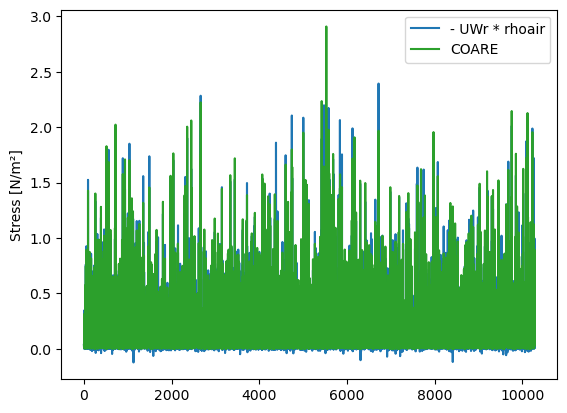

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-29 10:30:45.942324: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-29 10:30:45.942576: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 10:30:45.942584: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 10:30:45.942601: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-29 10:30:45.942805: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

180/180 [==============================] - 1s 3ms/step - loss: 2.9832 - mean_absolute_error: 1.2782 - val_loss: 1.6501 - val_mean_absolute_error: 0.9442
Epoch 2/500
180/180 [==============================] - 0s 671us/step - loss: 1.6698 - mean_absolute_error: 0.8956 - val_loss: 1.0568 - val_mean_absolute_error: 0.7068
Epoch 3/500
180/180 [==============================] - 0s 639us/step - loss: 1.0491 - mean_absolute_error: 0.6782 - val_loss: 0.8769 - val_mean_absolute_error: 0.6125
Epoch 4/500
180/180 [==============================] - 0s 615us/step - loss: 0.8922 - mean_absolute_error: 0.6005 - val_loss: 0.8291 - val_mean_absolute_error: 0.5866
Epoch 5/500
180/180 [==============================] - 0s 598us/step - loss: 0.8648 - mean_absolute_error: 0.5889 - val_loss: 0.8137 - val_mean_absolute_error: 0.5790
Epoch 6/500
180/180 [==============================] - 0s 642us/step - loss: 0.9185 - mean_absolute_error: 0.5991 - val_loss: 0.8054 - val_mean_absolute_error: 0.5753
Epoch 7/500


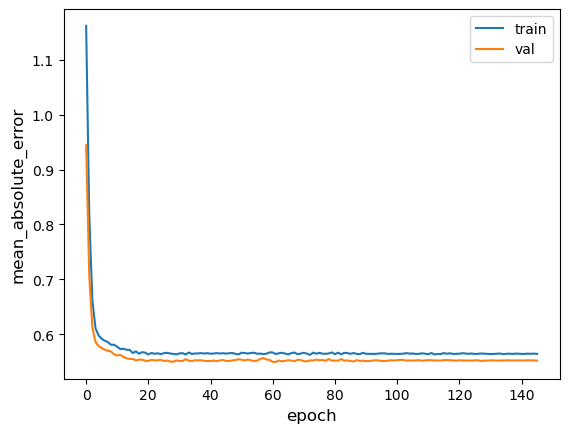

65/65 [==============================] - 0s 351us/step - loss: 0.7823 - mean_absolute_error: 0.5725
Test accuracy 0.5725385546684265
Test loss 0.7822820544242859


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.1751614110089816

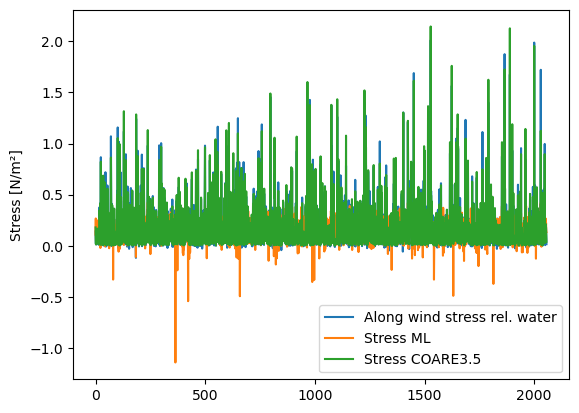

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

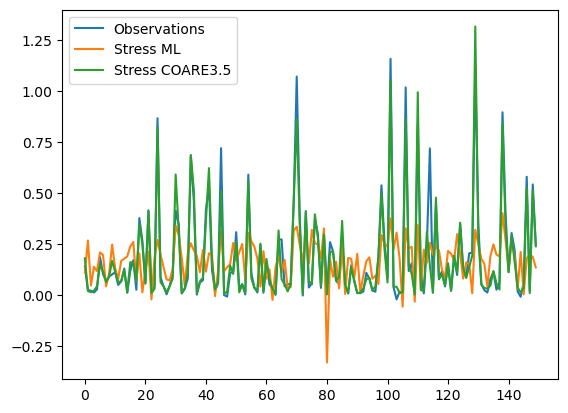

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

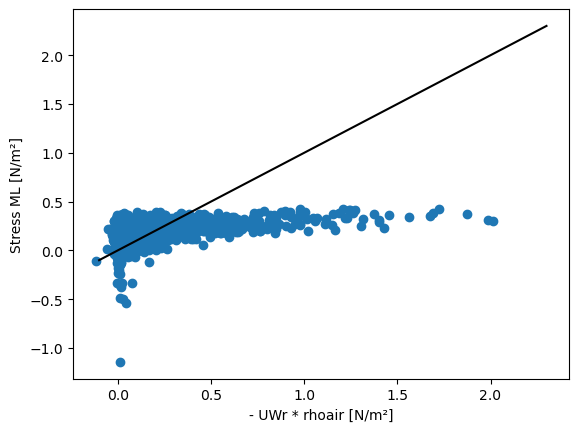

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

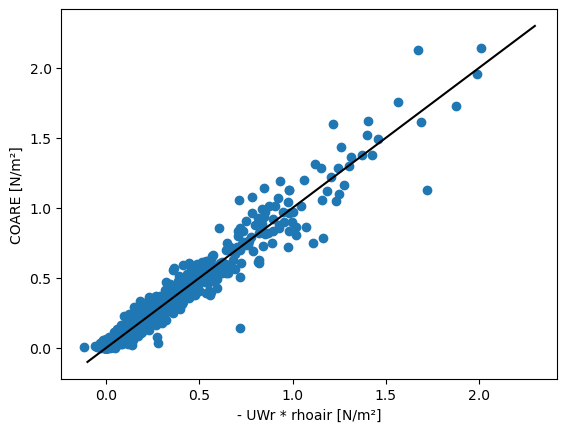

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.26074020315002416

In [35]:
rmse(y_test.values, c_test)

0.050133499822846775

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.45719889],
       [0.45719889, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

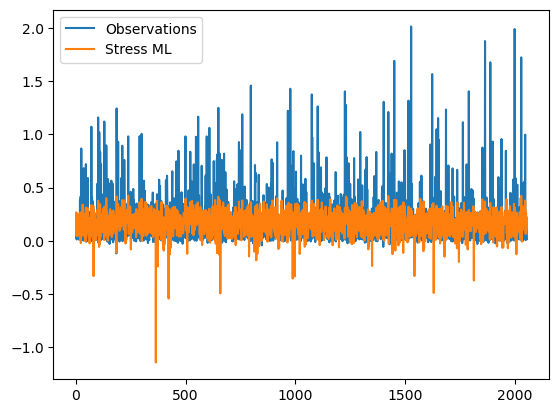

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.45719889],
       [0.45719889, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.26074020315002416

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.45719889],
       [0.45719889, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

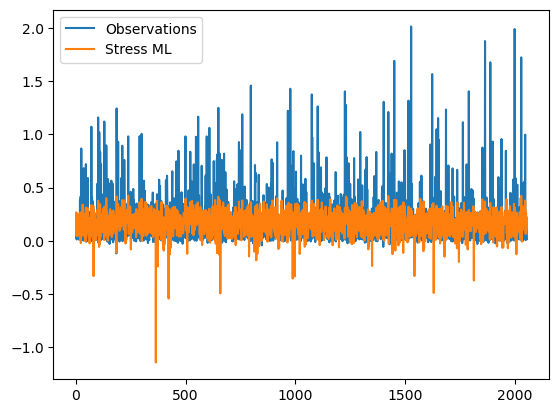

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.45719889],
       [0.45719889, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.26074020315002416

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 2.2271 - mean_absolute_error: 1.0998 - val_loss: 1.1224 - val_mean_absolute_error: 0.7394
Epoch 2/500
180/180 [==============================] - 0s 887us/step - loss: 1.1008 - mean_absolute_error: 0.7137 - val_loss: 0.8913 - val_mean_absolute_error: 0.6353
Epoch 3/500
180/180 [==============================] - 0s 849us/step - loss: 0.9757 - mean_absolute_error: 0.6450 - val_loss: 0.8376 - val_mean_absolute_error: 0.6012
Epoch 4/500
180/180 [==============================] - 0s 837us/step - loss: 0.8801 - mean_absolute_error: 0.6185 - val_loss: 0.8149 - val_mean_absolute_error: 0.5892
Epoch 5/500
180/180 [==============================] - 0s 802us/step - loss: 0.8710 - mean_absolute_error: 0.6040 - val_loss: 0.7992 - val_mean_absolute_error: 0.5878
Epoch 6/500
180/180 [==============================] - 0s 832us/step - loss: 0.8237 - mean_absolute_error: 0.5929 - val_loss: 0.7900 - val_mean_absolute_error: 0.5851


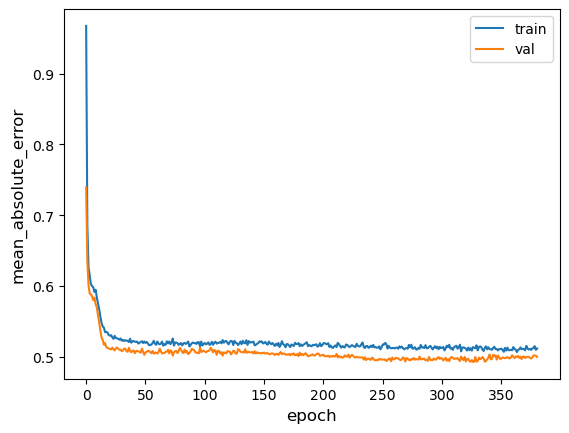

65/65 [==============================] - 0s 367us/step - loss: 0.6652 - mean_absolute_error: 0.5097
Test accuracy 0.5096960663795471
Test loss 0.6651973128318787


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

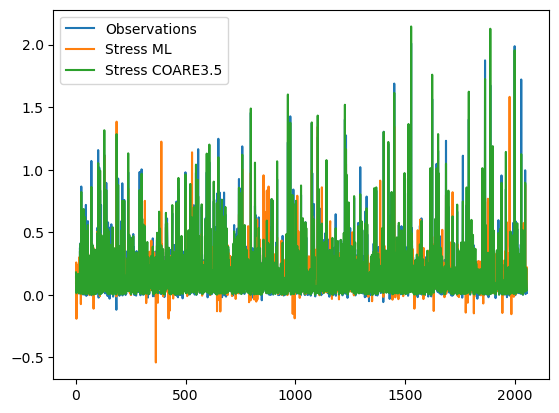

In [53]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

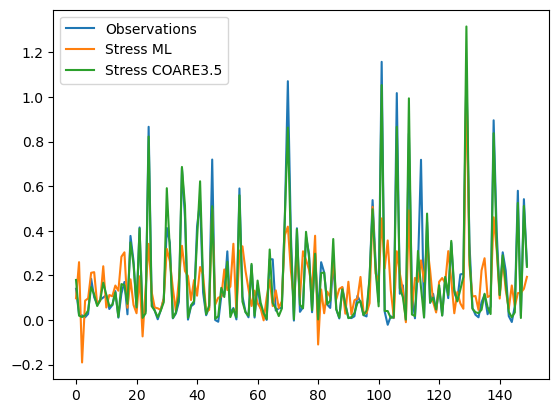

In [54]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [55]:
rmse(y_test.values, y_test_pred)

0.2807865423788485

## Correlation

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57524664],
       [0.57524664, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [58]:
y_test.values.shape

(2057,)

In [59]:
y_test_pred[:, 0].shape

(2057,)

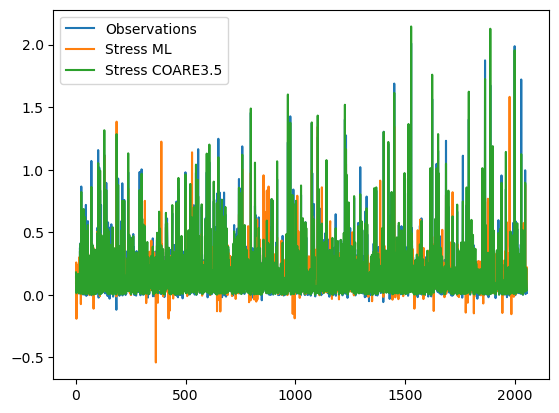

In [60]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

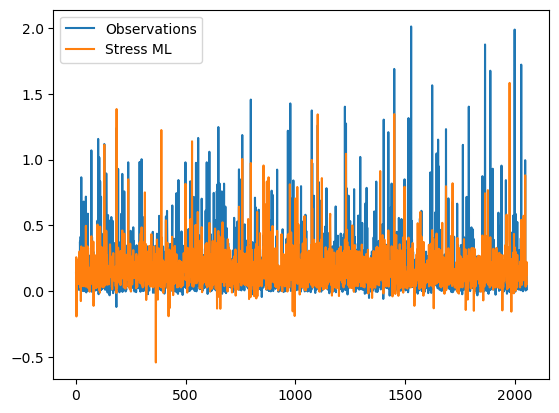

In [61]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [62]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [63]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2807865423788485

Text(0, 0.5, 'Stress ML [N/m²]')

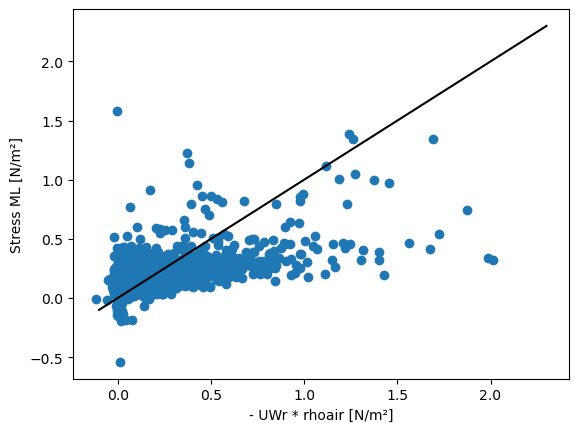

In [64]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [65]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [66]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [67]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 3.4619 - mean_absolute_error: 1.3804 - val_loss: 1.6658 - val_mean_absolute_error: 0.9209
Epoch 2/500
90/90 [==============================] - 0s 917us/step - loss: 2.1490 - mean_absolute_error: 1.0879 - val_loss: 1.2984 - val_mean_absolute_error: 0.8267
Epoch 3/500
90/90 [==============================] - 0s 903us/step - loss: 1.6398 - mean_absolute_error: 0.9291 - val_loss: 1.0935 - val_mean_absolute_error: 0.7508
Epoch 4/500
90/90 [==============================] - 0s 925us/step - loss: 1.4873 - mean_absolute_error: 0.8773 - val_loss: 0.9944 - val_mean_absolute_error: 0.6992
Epoch 5/500
90/90 [==============================] - 0s 890us/step - loss: 1.3593 - mean_absolute_error: 0.8167 - val_loss: 0.9345 - val_mean_absolute_error: 0.6628
Epoch 6/500
90/90 [==============================] - 0s 886us/step - loss: 1.1919 - mean_absolute_error: 0.7684 - val_loss: 0.8965 - val_mean_absolute_error: 0.6372
Epoch 7/500


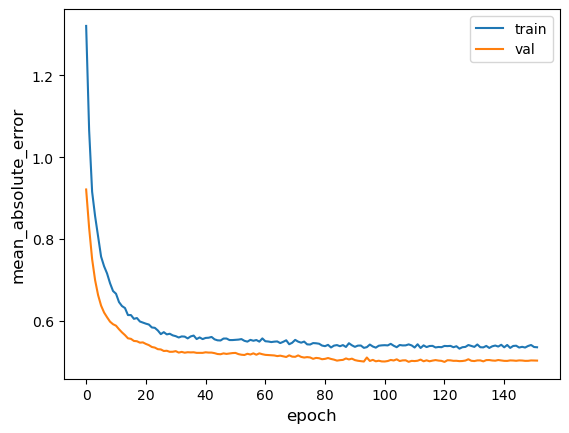

65/65 [==============================] - 0s 363us/step - loss: 0.6726 - mean_absolute_error: 0.5205
Test accuracy 0.5204899311065674
Test loss 0.6725888848304749


In [68]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [70]:
rmse(y_test.values, y_test_pred)

0.26701135970801854

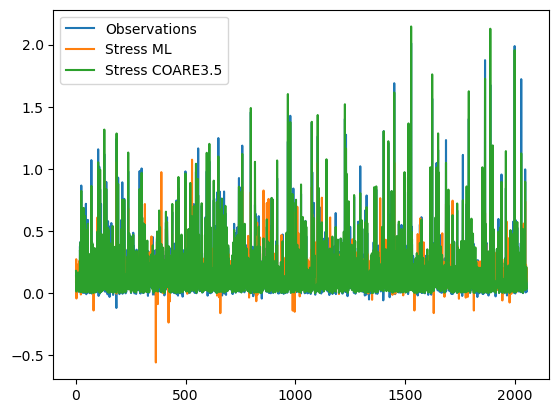

In [71]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

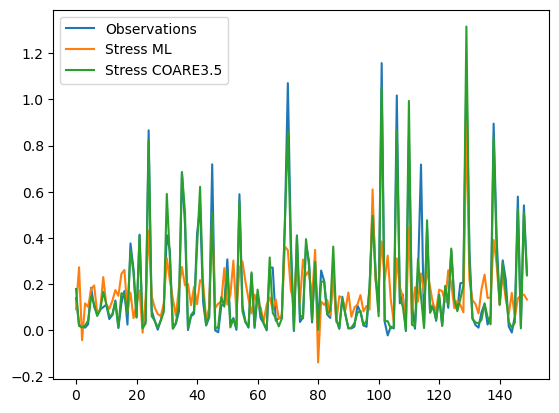

In [72]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

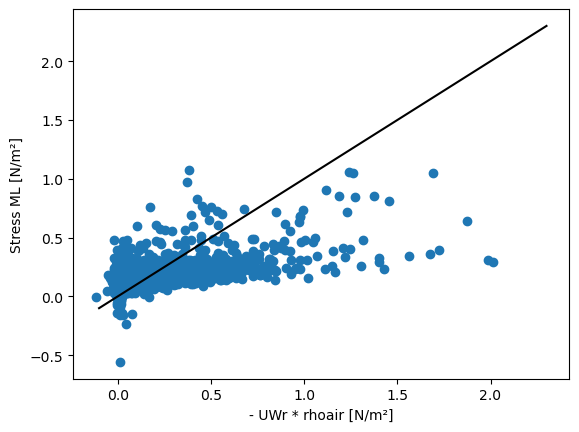

In [73]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [74]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.56842874],
       [0.56842874, 1.        ]])

In [75]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

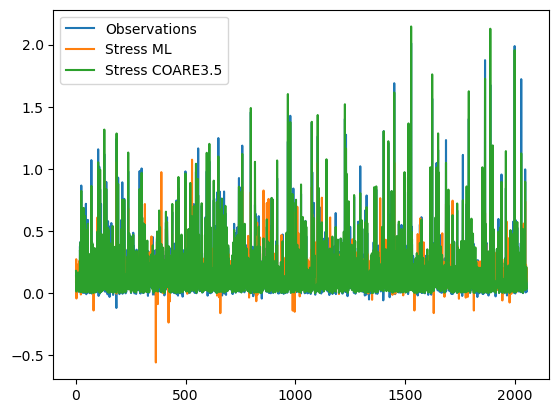

In [76]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

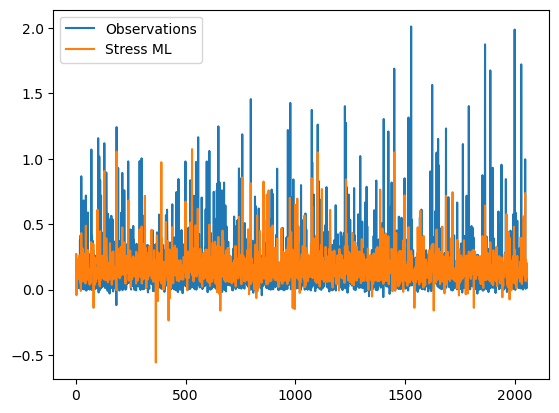

In [77]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [78]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [79]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.26701135970801854

Text(0, 0.5, 'Stress ML [N/m²]')

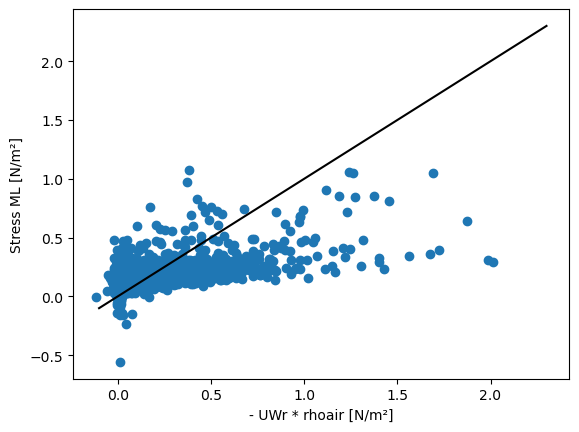

In [80]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [81]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [82]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [83]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 2.3249 - mean_absolute_error: 1.1204 - val_loss: 0.8803 - val_mean_absolute_error: 0.6245
Epoch 2/500
180/180 [==============================] - 0s 848us/step - loss: 1.4811 - mean_absolute_error: 0.8585 - val_loss: 0.7872 - val_mean_absolute_error: 0.5666
Epoch 3/500
180/180 [==============================] - 0s 835us/step - loss: 1.1326 - mean_absolute_error: 0.7244 - val_loss: 0.7606 - val_mean_absolute_error: 0.5515
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 1.0211 - mean_absolute_error: 0.6795 - val_loss: 0.7397 - val_mean_absolute_error: 0.5393
Epoch 5/500
180/180 [==============================] - 0s 756us/step - loss: 0.9727 - mean_absolute_error: 0.6502 - val_loss: 0.7246 - val_mean_absolute_error: 0.5309
Epoch 6/500
180/180 [==============================] - 0s 752us/step - loss: 0.8953 - mean_absolute_error: 0.6105 - val_loss: 0.7077 - val_mean_absolute_error: 0.5281
Ep

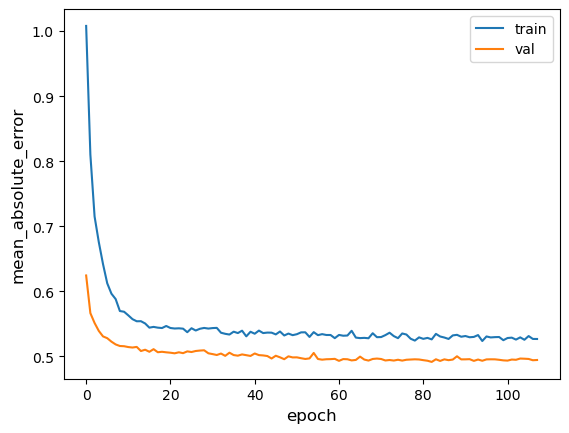

65/65 [==============================] - 0s 367us/step - loss: 0.6642 - mean_absolute_error: 0.5122
Test accuracy 0.5122469067573547
Test loss 0.6641910076141357


In [84]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [85]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [86]:
rmse(y_test.values, y_test_pred)

0.27053591414828526

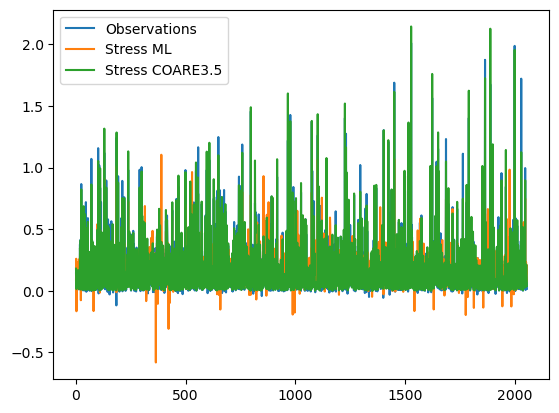

In [87]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

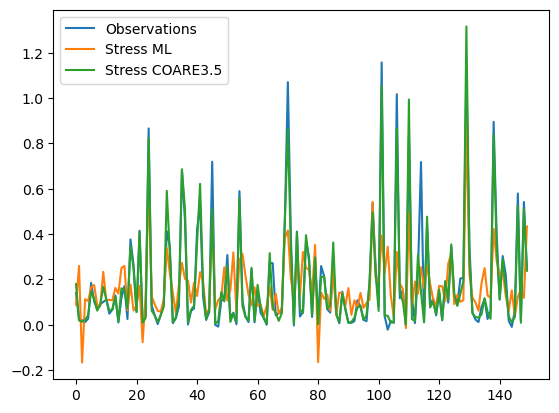

In [88]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

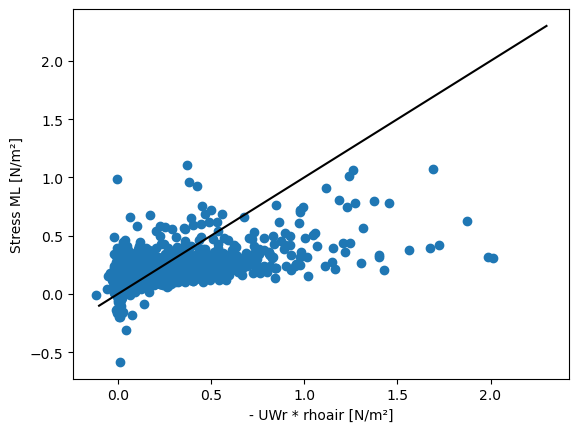

In [89]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [90]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57407399],
       [0.57407399, 1.        ]])

In [91]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

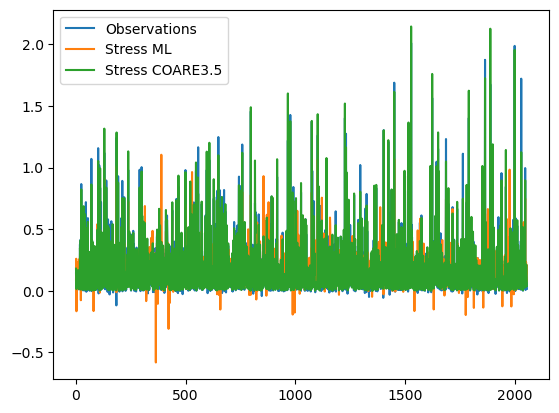

In [92]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

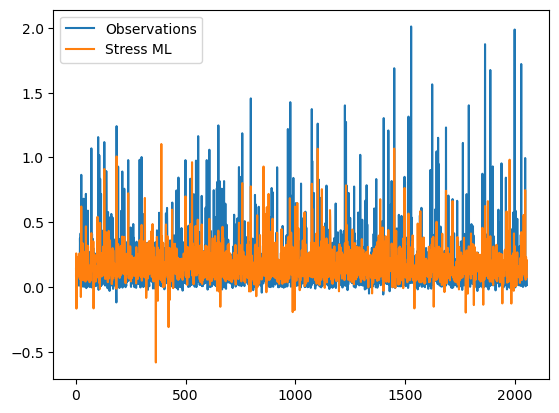

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [94]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [95]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.27053591414828526

Text(0, 0.5, 'Stress ML [N/m²]')

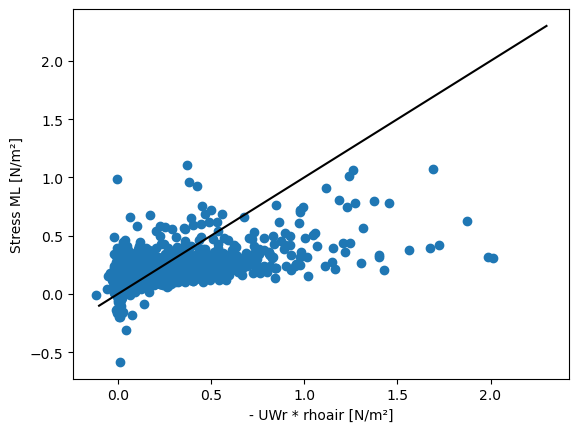

In [96]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [97]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [98]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [99]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 2ms/step - loss: 1.9165 - mean_absolute_error: 0.9787 - val_loss: 0.7722 - val_mean_absolute_error: 0.5604
Epoch 2/500
180/180 [==============================] - 0s 1ms/step - loss: 1.1133 - mean_absolute_error: 0.7291 - val_loss: 0.6978 - val_mean_absolute_error: 0.5286
Epoch 3/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8501 - mean_absolute_error: 0.6487 - val_loss: 0.6169 - val_mean_absolute_error: 0.4927
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7276 - mean_absolute_error: 0.5902 - val_loss: 0.6057 - val_mean_absolute_error: 0.4944
Epoch 5/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7558 - mean_absolute_error: 0.5841 - val_loss: 0.5994 - val_mean_absolute_error: 0.4790
Epoch 6/500
180/180 [==============================] - 0s 1ms/step - loss: 0.7103 - mean_absolute_error: 0.5484 - val_loss: 0.5861 - val_mean_absolute_error: 0.4733
Epoch 7/50

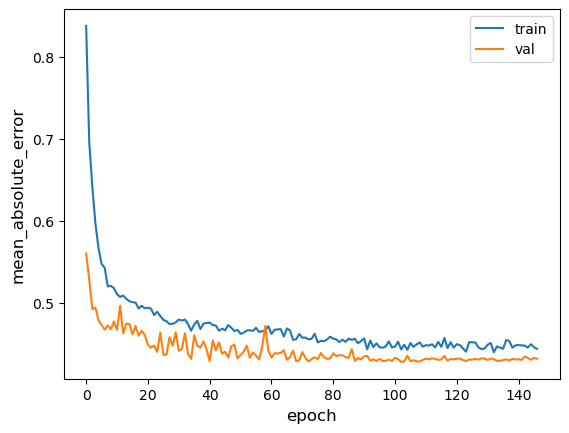

65/65 [==============================] - 0s 385us/step - loss: 0.4750 - mean_absolute_error: 0.4247
Test accuracy 0.4247053861618042
Test loss 0.4749924838542938


In [100]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [101]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [102]:
rmse(y_test.values, y_test_pred)

0.29273822091130264

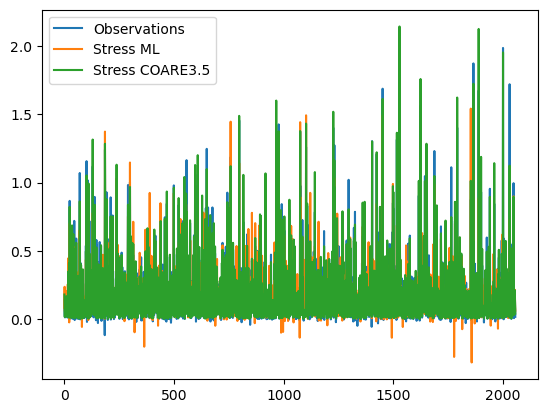

In [103]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

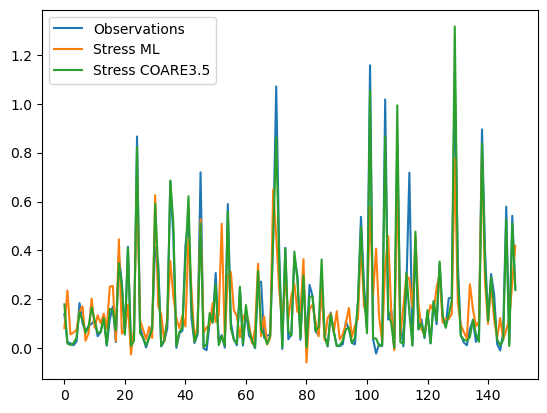

In [104]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

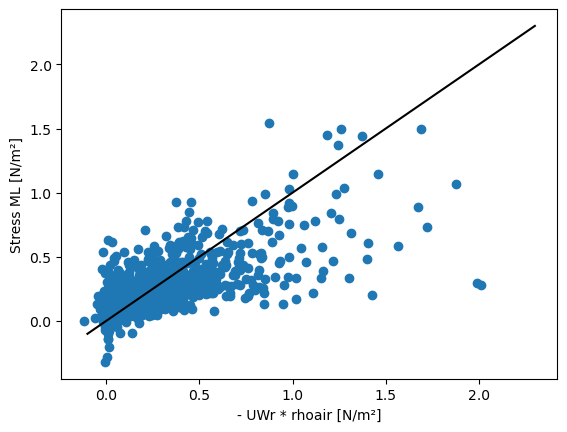

In [105]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [106]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72090218],
       [0.72090218, 1.        ]])

In [107]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

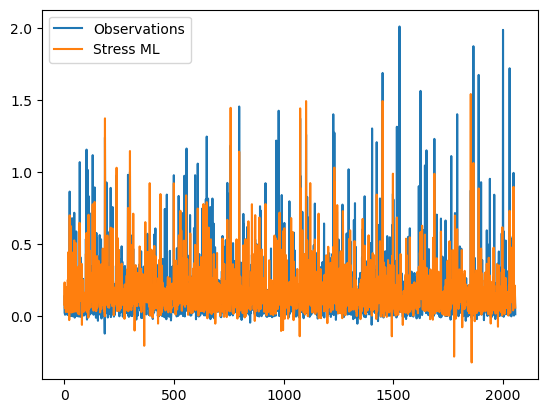

In [108]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [109]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [110]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.29273822091130264

Text(0, 0.5, 'Stress ML [N/m²]')

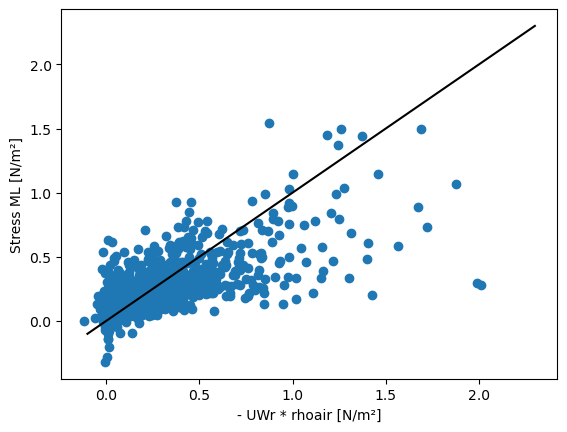

In [111]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [112]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.72090218],
       [0.72090218, 1.        ]])

In [113]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [114]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [115]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [116]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 3.2060 - mean_absolute_error: 1.2371 - val_loss: 0.8770 - val_mean_absolute_error: 0.5276
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 1.0381 - mean_absolute_error: 0.7366 - val_loss: 0.6876 - val_mean_absolute_error: 0.4999
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.7681 - mean_absolute_error: 0.6294 - val_loss: 0.6361 - val_mean_absolute_error: 0.4981
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.7712 - mean_absolute_error: 0.6077 - val_loss: 0.5445 - val_mean_absolute_error: 0.4519
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6500 - mean_absolute_error: 0.5552 - val_loss: 0.5532 - val_mean_absolute_error: 0.4650
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6982 - mean_absolute_error: 0.5521 - val_loss: 0.5509 - val_mean_absolute_error: 0.4616
Epoch 7/50

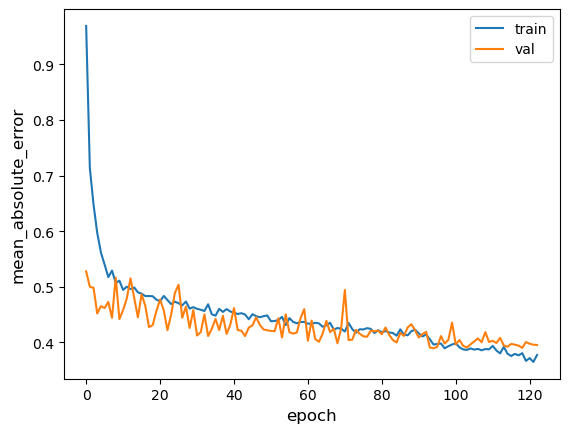

65/65 [==============================] - 0s 686us/step - loss: 0.4144 - mean_absolute_error: 0.3744
Test accuracy 0.3743506968021393
Test loss 0.4144419729709625


In [117]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [118]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [119]:
rmse(y_test.values, y_test_pred)

0.30449956291726515

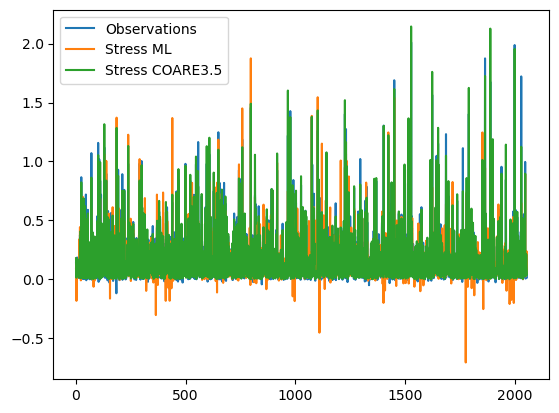

In [120]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

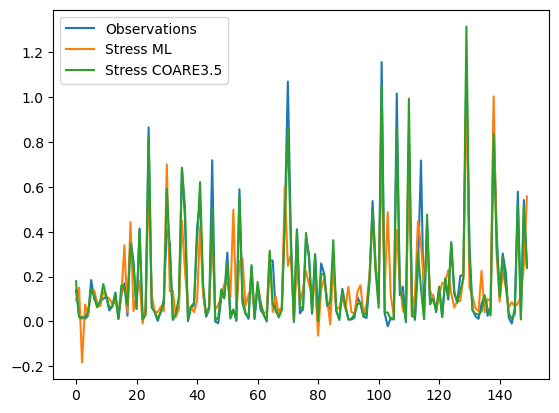

In [121]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [122]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.76420645],
       [0.76420645, 1.        ]])

In [123]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

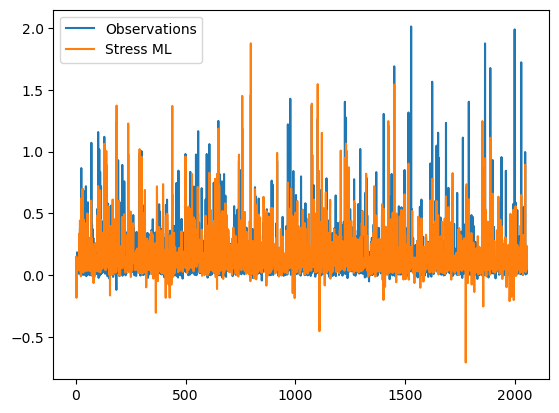

In [124]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [125]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [126]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.30449956291726515

Text(0, 0.5, 'Stress ML [N/m²]')

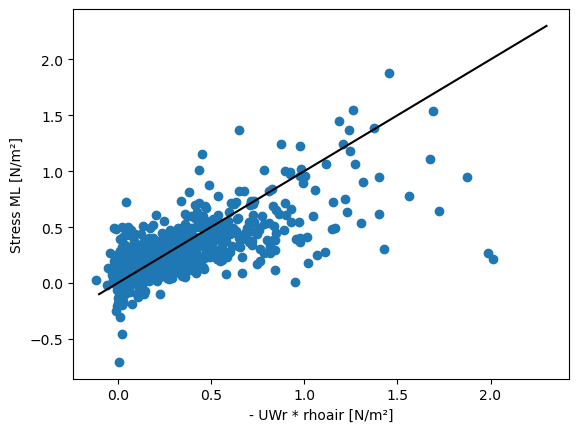

In [127]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [128]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [129]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [130]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
180/180 [==============================] - 3s 13ms/step - loss: 3.1725 - mean_absolute_error: 1.2289 - val_loss: 1.0167 - val_mean_absolute_error: 0.8017
Epoch 2/500
180/180 [==============================] - 2s 12ms/step - loss: 1.1186 - mean_absolute_error: 0.7558 - val_loss: 0.8022 - val_mean_absolute_error: 0.5495
Epoch 3/500
180/180 [==============================] - 2s 13ms/step - loss: 0.8560 - mean_absolute_error: 0.6530 - val_loss: 0.6307 - val_mean_absolute_error: 0.4994
Epoch 4/500
180/180 [==============================] - 2s 13ms/step - loss: 0.8068 - mean_absolute_error: 0.6172 - val_loss: 0.6154 - val_mean_absolute_error: 0.5174
Epoch 5/500
180/180 [==============================] - 2s 12ms/step - loss: 0.7200 - mean_absolute_error: 0.5730 - val_loss: 0.5900 - val_mean_absolute_error: 0.5174
Epoch 6/500
180/180 [==============================] - 2s 12ms/step - loss: 0.6807 - mean_absolute_error: 0.5433 - val_loss: 0.5617 - val_mean_absolute_error: 0.4793
Epoc

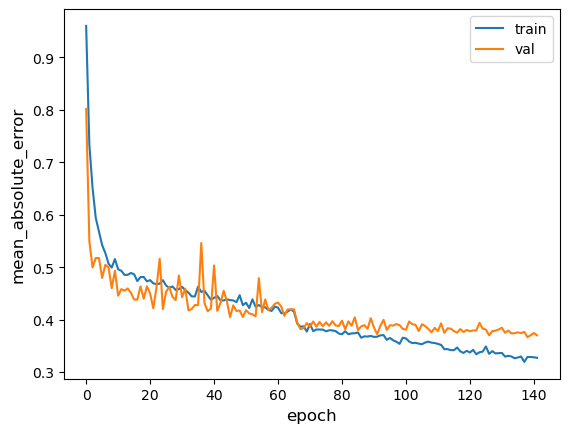

65/65 [==============================] - 0s 2ms/step - loss: 0.3902 - mean_absolute_error: 0.3567
Test accuracy 0.3567253351211548
Test loss 0.39024168252944946


In [131]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [132]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [133]:
rmse(y_test.values, y_test_pred)

0.29912476051388054

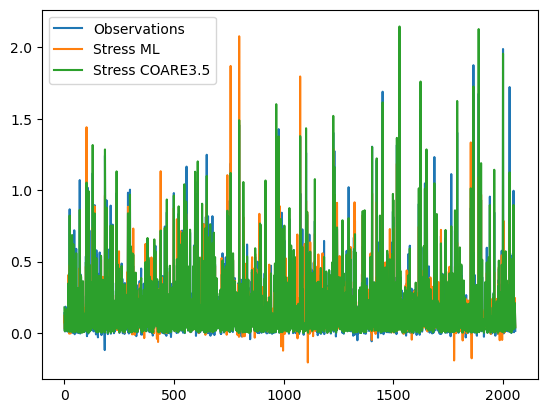

In [134]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

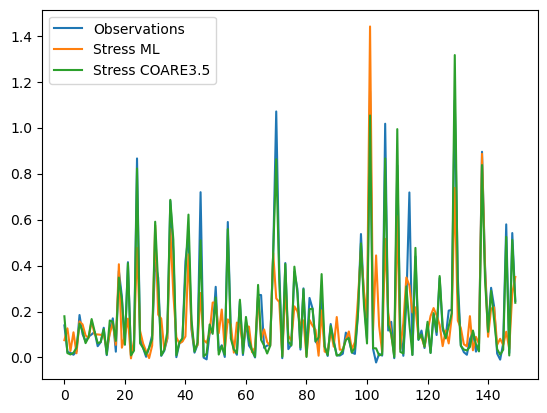

In [135]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [136]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78003217],
       [0.78003217, 1.        ]])

In [137]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

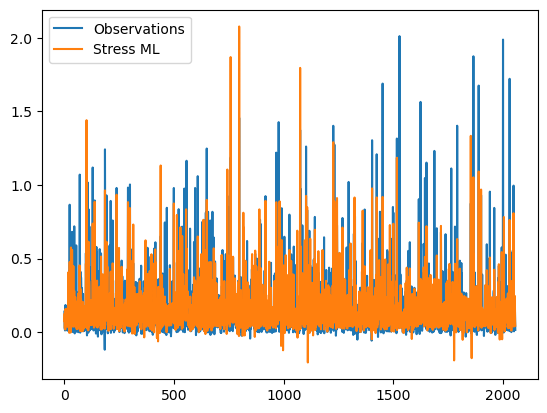

In [138]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [139]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [140]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.29912476051388054

Text(0, 0.5, 'Stress ML [N/m²]')

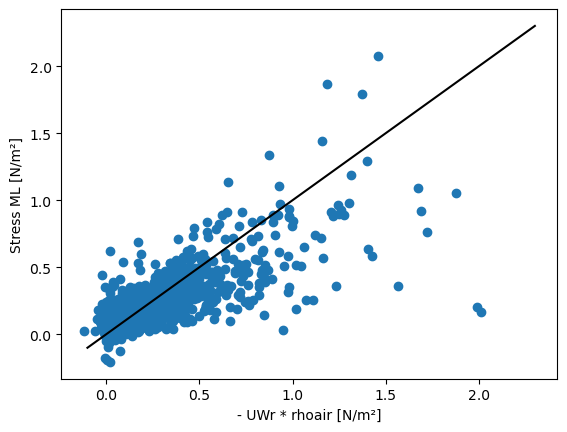

In [141]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

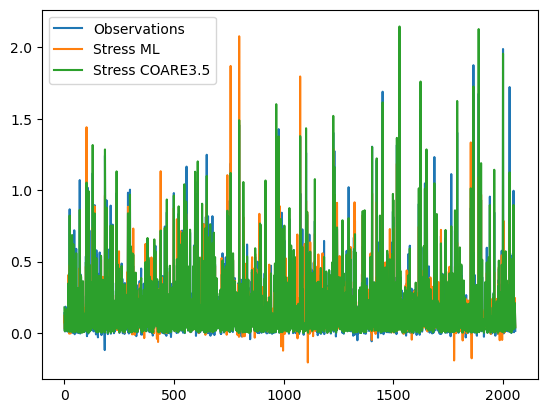

In [142]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

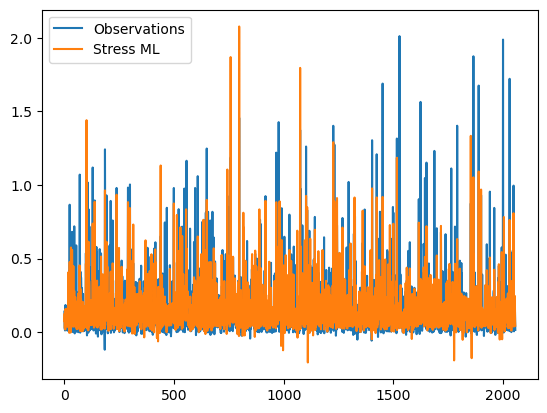

In [143]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [144]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.78003217],
       [0.78003217, 1.        ]])

In [145]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [146]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.29912476051388054

Text(0, 0.5, 'Stress ML [N/m²]')

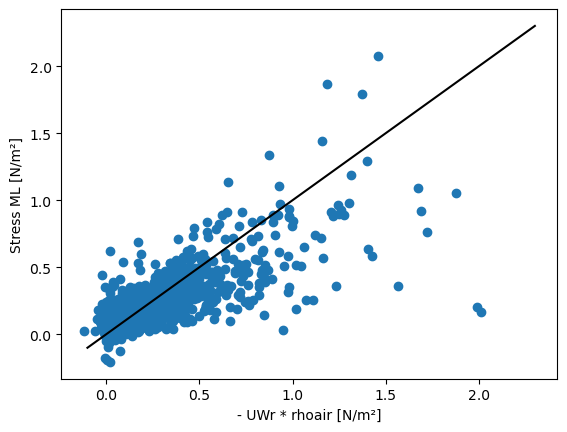

In [147]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

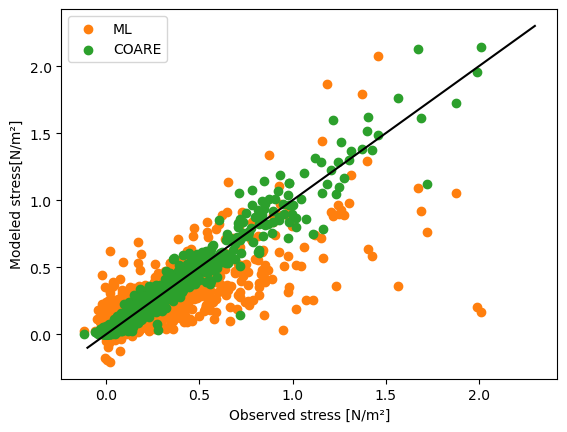

In [148]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

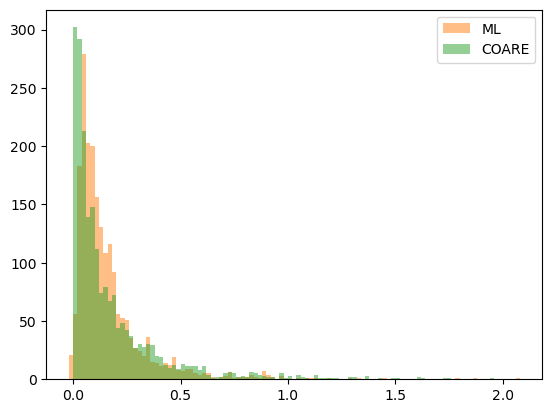

In [149]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

In [150]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [151]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [152]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 42ms/step - loss: 16.1503 - mean_absolute_error: 2.2773 - val_loss: 0.9273 - val_mean_absolute_error: 0.6425
Epoch 2/500
12/12 [==============================] - 0s 30ms/step - loss: 1.7393 - mean_absolute_error: 0.9605 - val_loss: 0.8694 - val_mean_absolute_error: 0.5739
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 1.2959 - mean_absolute_error: 0.8380 - val_loss: 0.8922 - val_mean_absolute_error: 0.5772
Epoch 4/500
12/12 [==============================] - 0s 31ms/step - loss: 1.1993 - mean_absolute_error: 0.7873 - val_loss: 0.9145 - val_mean_absolute_error: 0.5530
Epoch 5/500
12/12 [==============================] - 0s 31ms/step - loss: 1.1412 - mean_absolute_error: 0.7714 - val_loss: 0.9214 - val_mean_absolute_error: 0.5430
Epoch 6/500
12/12 [==============================] - 0s 32ms/step - loss: 1.0455 - mean_absolute_error: 0.7371 - val_loss: 0.9131 - val_mean_absolute_error: 0.5638
Epoch 7/500
12/

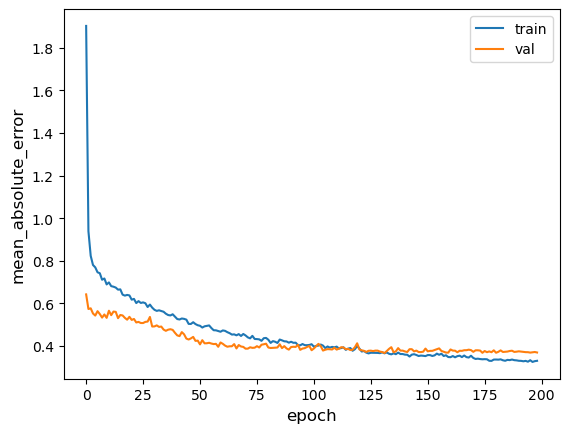

65/65 [==============================] - 0s 2ms/step - loss: 0.3866 - mean_absolute_error: 0.3522
Test accuracy 0.35223284363746643
Test loss 0.3866068720817566


In [153]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [154]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [155]:
rmse(y_test.values, y_test_pred)

0.30164416114205117

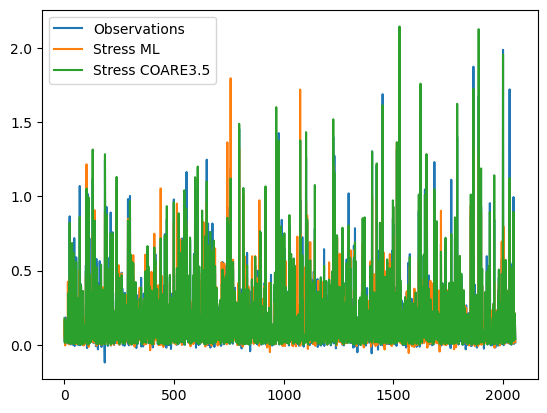

In [156]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

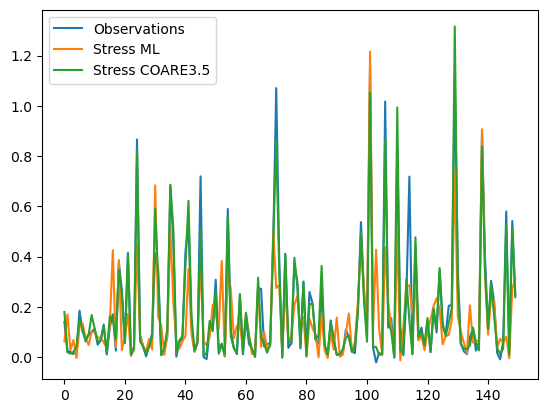

In [157]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [158]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78478123],
       [0.78478123, 1.        ]])

In [159]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

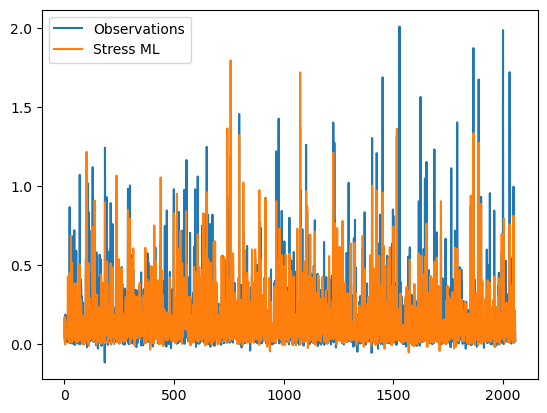

In [160]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [161]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [162]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.30164416114205117

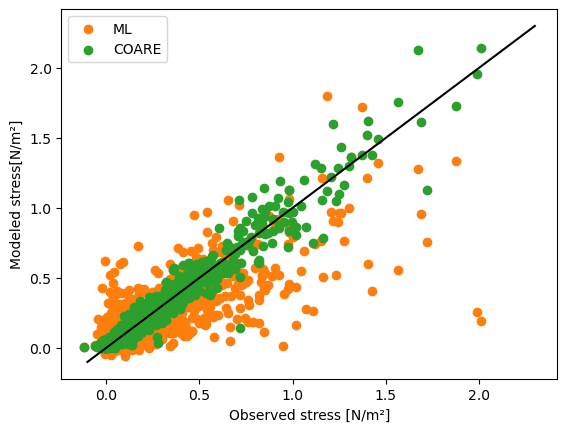

In [163]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

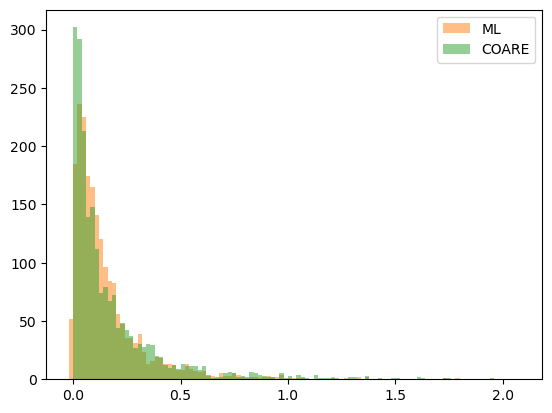

In [164]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 42ms/step - loss: 9.0965 - mean_absolute_error: 2.0288 - val_loss: 0.9162 - val_mean_absolute_error: 0.6298
Epoch 2/500
12/12 [==============================] - 0s 32ms/step - loss: 1.6362 - mean_absolute_error: 0.9354 - val_loss: 0.9020 - val_mean_absolute_error: 0.6546
Epoch 3/500
12/12 [==============================] - 0s 31ms/step - loss: 1.2537 - mean_absolute_error: 0.7857 - val_loss: 0.8986 - val_mean_absolute_error: 0.6649
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 1.1035 - mean_absolute_error: 0.7413 - val_loss: 0.8628 - val_mean_absolute_error: 0.6206
Epoch 5/500
12/12 [==============================] - 0s 31ms/step - loss: 1.0932 - mean_absolute_error: 0.7333 - val_loss: 0.9013 - val_mean_absolute_error: 0.6711
Epoch 6/500
12/12 [==============================] - 0s 31ms/step - loss: 0.9008 - mean_absolute_error: 0.6779 - val_loss: 0.8923 - val_mean_absolute_error: 0.6693
Epoch 7/500
12/1

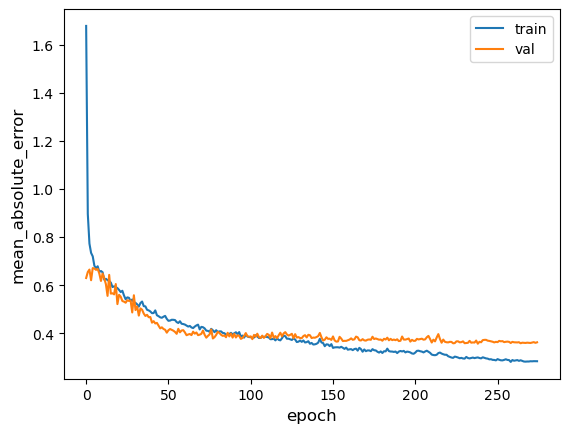

65/65 [==============================] - 0s 2ms/step - loss: 0.3806 - mean_absolute_error: 0.3486
Test accuracy 0.3486357033252716
Test loss 0.3806484639644623


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [170]:
rmse(y_test.values, y_test_pred)

0.30634974084165123

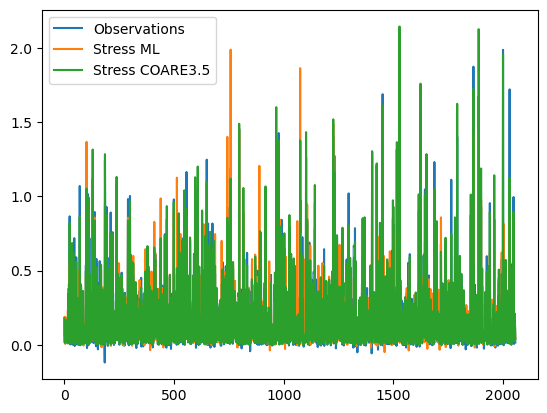

In [171]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

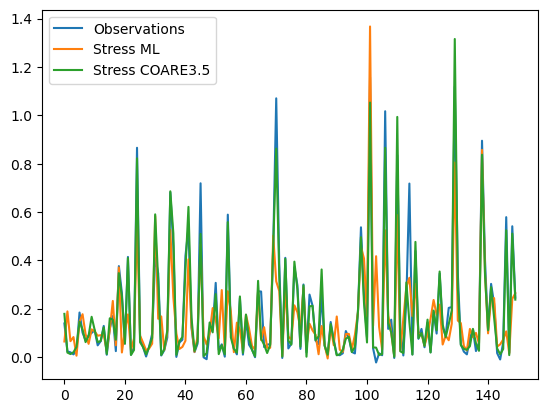

In [172]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [173]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78586913],
       [0.78586913, 1.        ]])

In [174]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

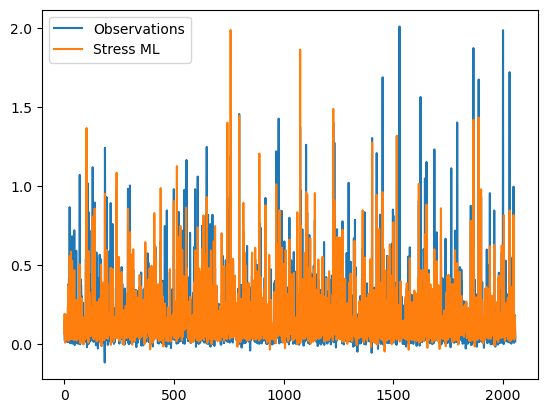

In [175]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [176]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [177]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.30634974084165123

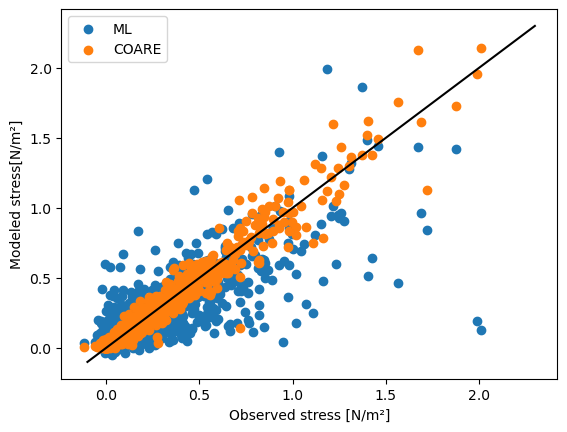

In [178]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

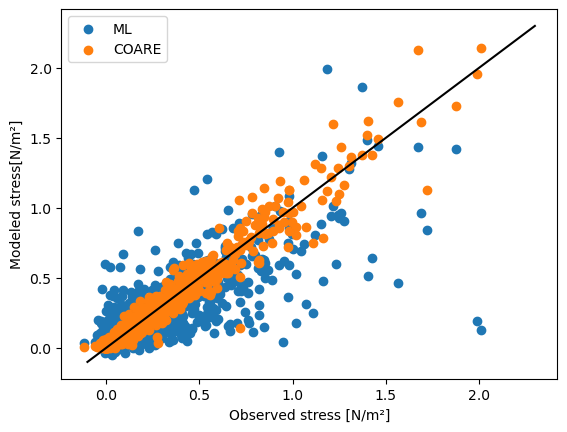

In [179]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [180]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [181]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [182]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 134ms/step - loss: 16.2592 - mean_absolute_error: 2.6398 - val_loss: 0.9591 - val_mean_absolute_error: 0.6750
Epoch 2/500
6/6 [==============================] - 1s 108ms/step - loss: 2.4810 - mean_absolute_error: 1.1485 - val_loss: 0.8665 - val_mean_absolute_error: 0.6037
Epoch 3/500
6/6 [==============================] - 1s 113ms/step - loss: 1.7042 - mean_absolute_error: 0.9260 - val_loss: 0.9458 - val_mean_absolute_error: 0.6446
Epoch 4/500
6/6 [==============================] - 1s 117ms/step - loss: 1.4309 - mean_absolute_error: 0.8453 - val_loss: 0.8667 - val_mean_absolute_error: 0.6072
Epoch 5/500
6/6 [==============================] - 1s 113ms/step - loss: 1.3696 - mean_absolute_error: 0.7901 - val_loss: 0.8898 - val_mean_absolute_error: 0.5801
Epoch 6/500
6/6 [==============================] - 1s 111ms/step - loss: 1.2424 - mean_absolute_error: 0.7713 - val_loss: 0.8783 - val_mean_absolute_error: 0.6329
Epoch 7/500
6/6 [====

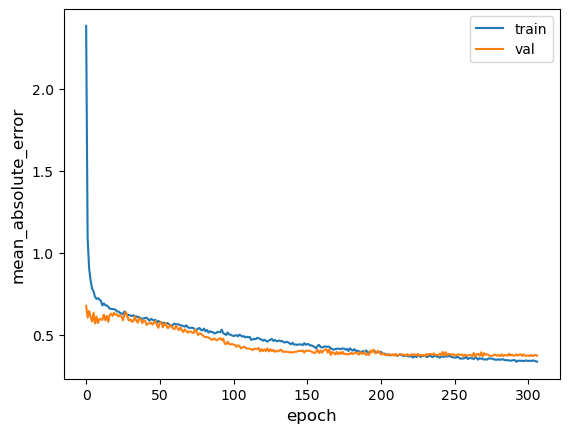

65/65 [==============================] - 0s 7ms/step - loss: 0.3800 - mean_absolute_error: 0.3510
Test accuracy 0.35097524523735046
Test loss 0.38000503182411194


In [183]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [184]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [185]:
rmse(y_test.values, y_test_pred)

0.3054020025929248

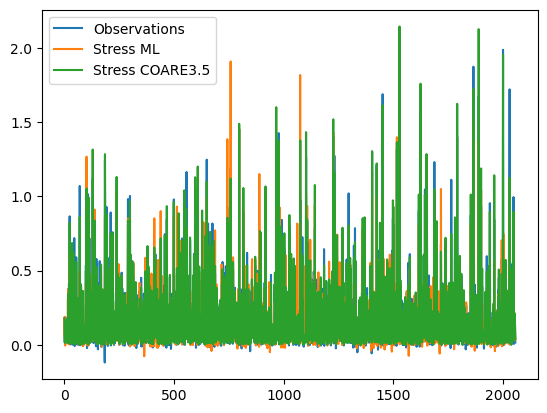

In [186]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

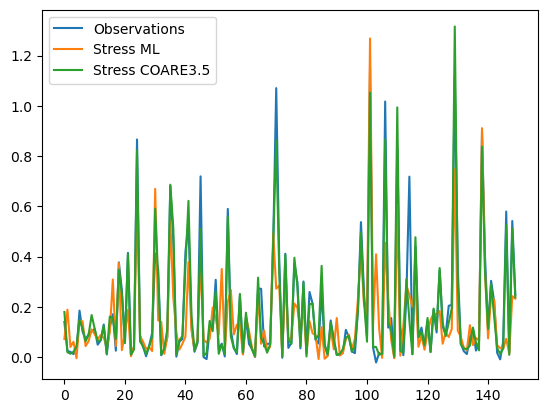

In [187]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [188]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.78988317],
       [0.78988317, 1.        ]])

In [189]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

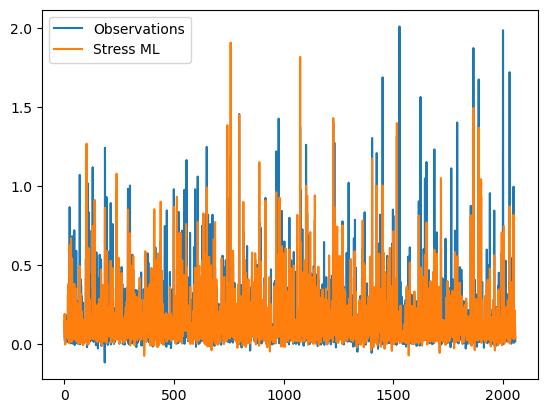

In [190]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [191]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [192]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3054020025929248

Text(0, 0.5, 'Stress ML [N/m²]')

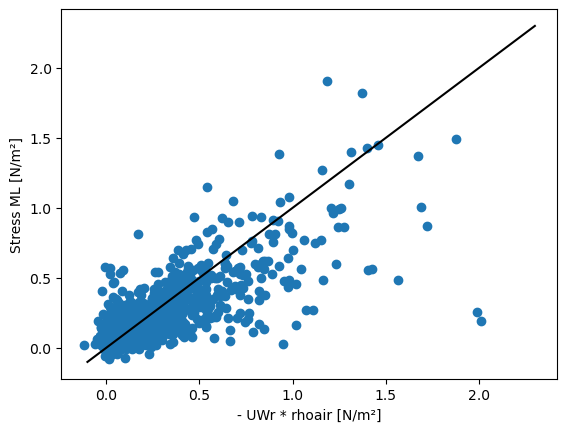

In [193]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

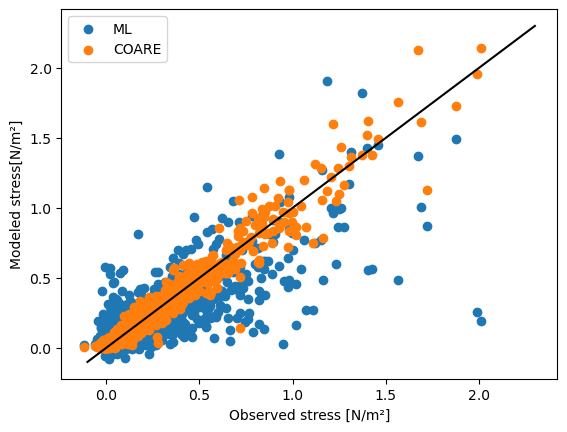

In [194]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [195]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [196]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [197]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 617ms/step - loss: 23.7124 - mean_absolute_error: 3.0504 - val_loss: 0.9100 - val_mean_absolute_error: 0.6032
Epoch 2/1000
3/3 [==============================] - 2s 550ms/step - loss: 4.3370 - mean_absolute_error: 1.6262 - val_loss: 0.9312 - val_mean_absolute_error: 0.5854
Epoch 3/1000
3/3 [==============================] - 2s 553ms/step - loss: 2.3398 - mean_absolute_error: 1.1632 - val_loss: 0.9202 - val_mean_absolute_error: 0.5689
Epoch 4/1000
3/3 [==============================] - 2s 558ms/step - loss: 1.7439 - mean_absolute_error: 0.9882 - val_loss: 2.1470 - val_mean_absolute_error: 1.1301
Epoch 5/1000
3/3 [==============================] - 2s 561ms/step - loss: 1.5920 - mean_absolute_error: 0.9109 - val_loss: 5.2452 - val_mean_absolute_error: 2.0523
Epoch 6/1000
3/3 [==============================] - 2s 553ms/step - loss: 1.6061 - mean_absolute_error: 0.8720 - val_loss: 7.7349 - val_mean_absolute_error: 2.5950
Epoch 7/1000
3/

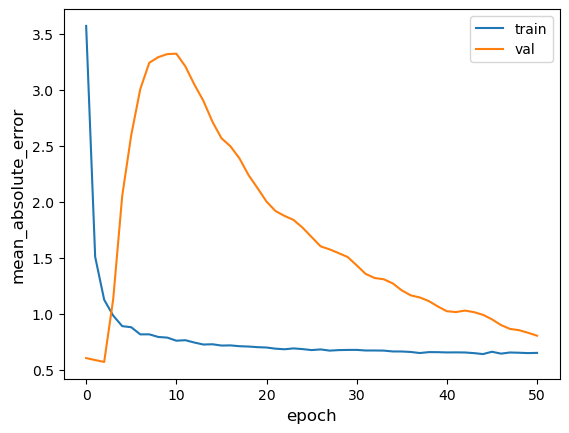

65/65 [==============================] - 2s 24ms/step - loss: 1.6143 - mean_absolute_error: 0.8272
Test accuracy 0.8271711468696594
Test loss 1.6142587661743164


In [198]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [199]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [200]:
rmse(y_test.values, y_test_pred)

0.3091334967103999

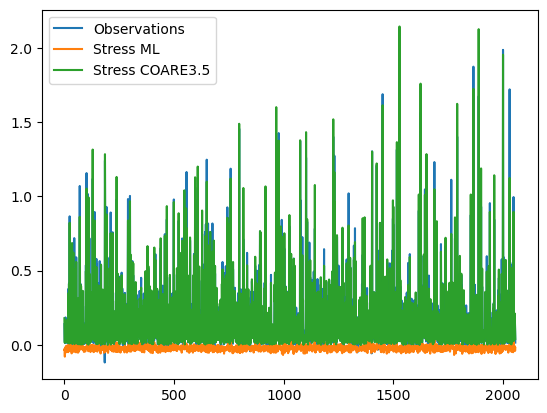

In [201]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

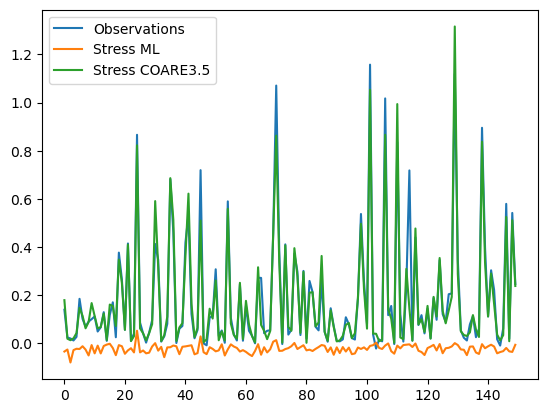

In [202]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [203]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.45512994],
       [0.45512994, 1.        ]])

In [204]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

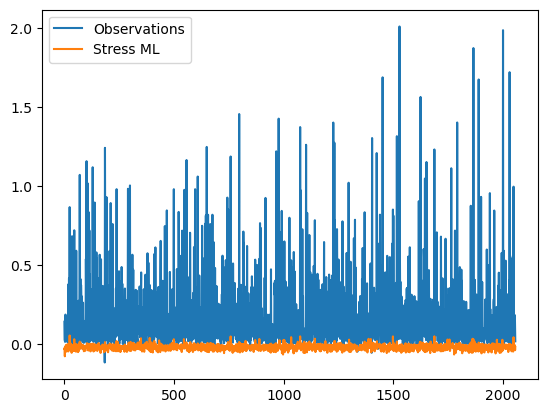

In [205]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [206]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [207]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3091334967103999

Text(0, 0.5, 'Stress ML [N/m²]')

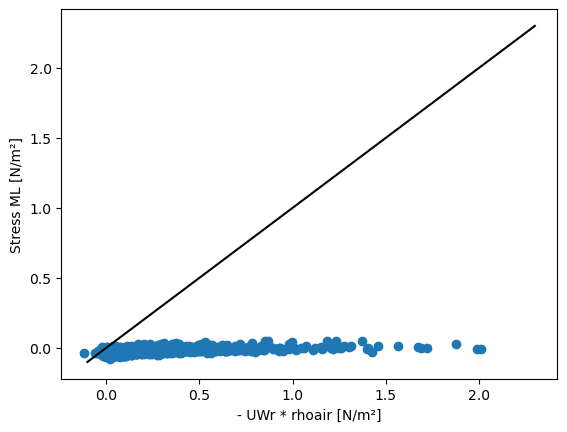

In [208]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [209]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [210]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [211]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 573ms/step - loss: 22.6533 - mean_absolute_error: 3.2774 - val_loss: 1.0024 - val_mean_absolute_error: 0.5870
Epoch 2/1000
3/3 [==============================] - 2s 522ms/step - loss: 3.0131 - mean_absolute_error: 1.3024 - val_loss: 1.4027 - val_mean_absolute_error: 0.8093
Epoch 3/1000
3/3 [==============================] - 1s 505ms/step - loss: 2.3525 - mean_absolute_error: 1.1113 - val_loss: 5.8234 - val_mean_absolute_error: 1.3502
Epoch 4/1000
3/3 [==============================] - 1s 497ms/step - loss: 2.0459 - mean_absolute_error: 0.9599 - val_loss: 2.7972 - val_mean_absolute_error: 1.1207
Epoch 5/1000
3/3 [==============================] - 1s 500ms/step - loss: 1.7376 - mean_absolute_error: 0.9550 - val_loss: 1.7453 - val_mean_absolute_error: 0.9663
Epoch 6/1000
3/3 [==============================] - 1s 503ms/step - loss: 1.6162 - mean_absolute_error: 0.9073 - val_loss: 2.9051 - val_mean_absolute_error: 1.2596
Epoch 7/1000
3/

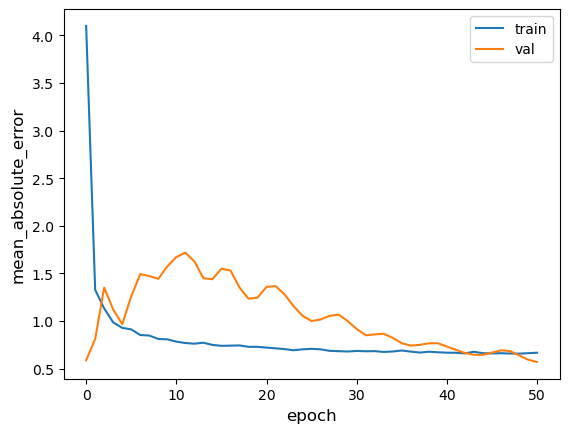

65/65 [==============================] - 2s 25ms/step - loss: 1.1628 - mean_absolute_error: 0.5948
Test accuracy 0.5947659015655518
Test loss 1.162841558456421


In [212]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [213]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [214]:
rmse(y_test.values, y_test_pred)

0.27028243617860764

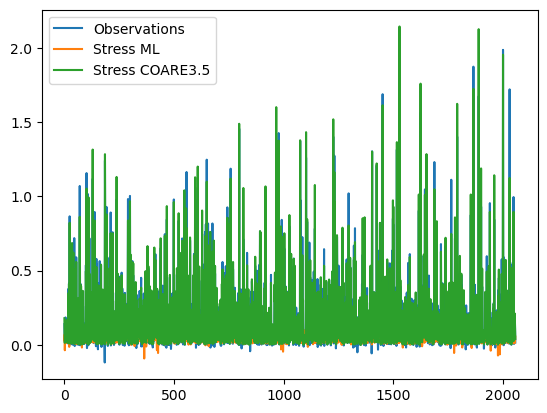

In [215]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

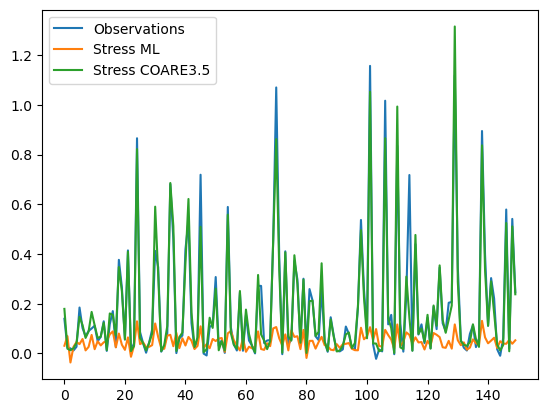

In [216]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [217]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.4999856],
       [0.4999856, 1.       ]])

In [218]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

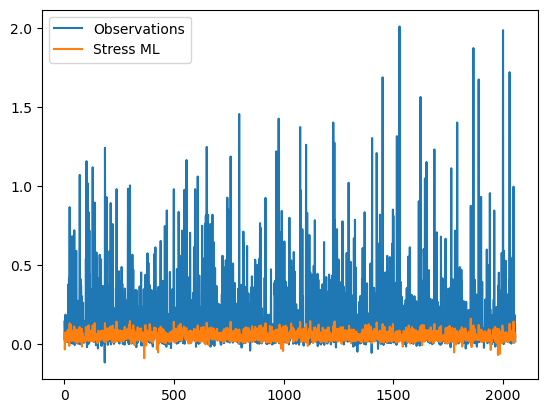

In [219]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [220]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [221]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.27028243617860764

Text(0, 0.5, 'Stress ML [N/m²]')

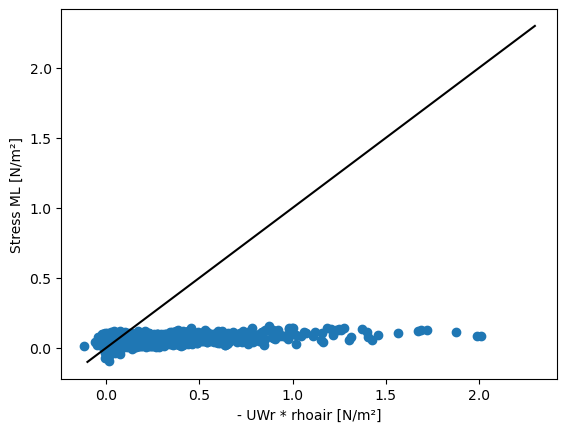

In [222]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [223]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [224]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [225]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 609ms/step - loss: 19.8009 - mean_absolute_error: 3.0995 - val_loss: 1.0197 - val_mean_absolute_error: 0.6022
Epoch 2/1000
3/3 [==============================] - 2s 557ms/step - loss: 3.2309 - mean_absolute_error: 1.3346 - val_loss: 1.1289 - val_mean_absolute_error: 0.6836
Epoch 3/1000
3/3 [==============================] - 2s 546ms/step - loss: 2.3876 - mean_absolute_error: 1.1467 - val_loss: 1.7338 - val_mean_absolute_error: 0.8509
Epoch 4/1000
3/3 [==============================] - 2s 550ms/step - loss: 1.9603 - mean_absolute_error: 1.0381 - val_loss: 1.1890 - val_mean_absolute_error: 0.6465
Epoch 5/1000
3/3 [==============================] - 2s 551ms/step - loss: 1.5984 - mean_absolute_error: 0.9196 - val_loss: 1.1100 - val_mean_absolute_error: 0.6451
Epoch 6/1000
3/3 [==============================] - 2s 557ms/step - loss: 1.3424 - mean_absolute_error: 0.8431 - val_loss: 1.1387 - val_mean_absolute_error: 0.6503
Epoch 7/1000
3/

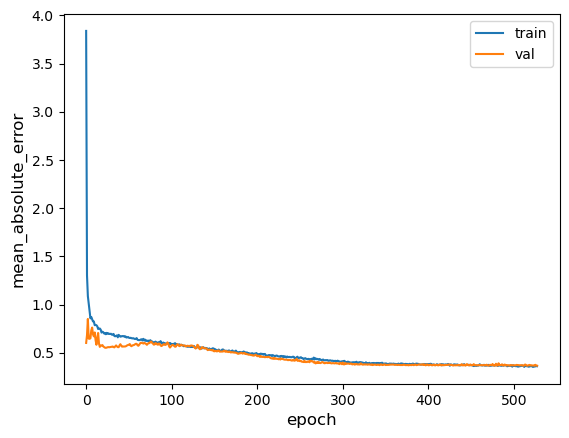

65/65 [==============================] - 2s 24ms/step - loss: 546.6334 - mean_absolute_error: 19.7202
Test accuracy 19.720230102539062
Test loss 546.6333618164062


In [226]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [227]:
y_test_pred = multi_dense_model.predict(x_test)

In [228]:
rmse(y_test.values, y_test_pred)

23.3961900882662

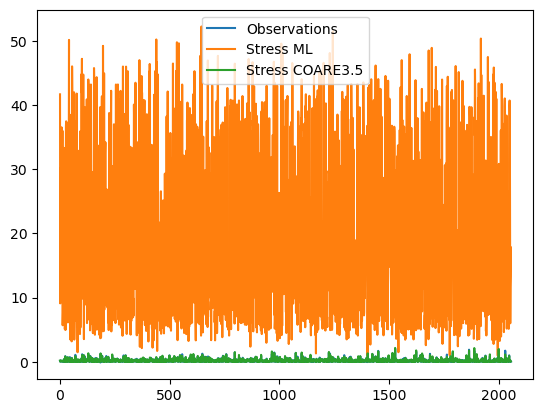

In [229]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

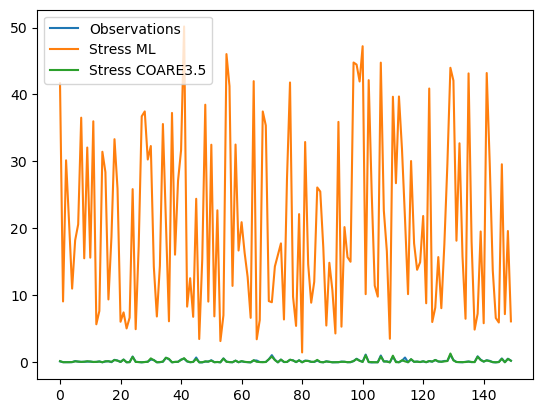

In [230]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [231]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.12519255],
       [0.12519255, 1.        ]])

In [232]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

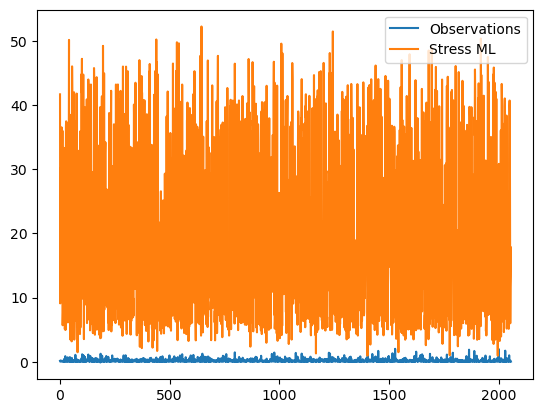

In [233]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [234]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97786782],
       [0.97786782, 1.        ]])

In [235]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

23.3961900882662

Text(0, 0.5, 'Stress ML [N/m²]')

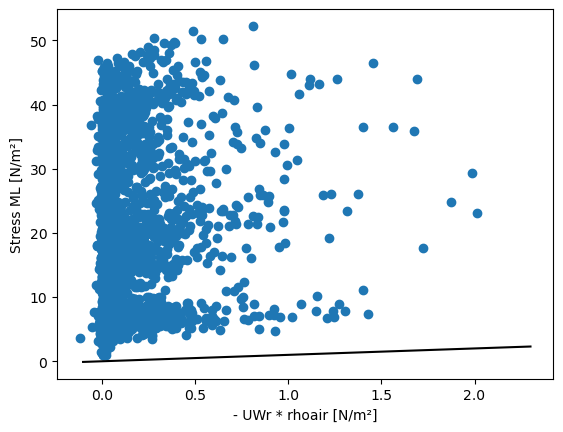

In [236]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 